In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt    
import seaborn as sns    
import tensorflow as tf

# 1. Upload Data

In [3]:

data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# 2.Let's examine the dataset

In [4]:
data.shape   

(35887, 3)

In [5]:
data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

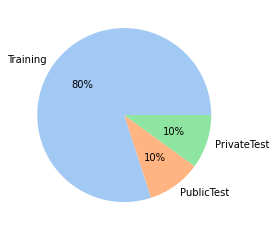

In [6]:
data_list = data['Usage'].value_counts()
groups = ['Training', 'PublicTest', 'PrivateTest']
colors = sns.color_palette('pastel')[0:5]

plt.pie(data_list, labels = groups, colors = colors, autopct='%.0f%%')
plt.show()

/home/hasan/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


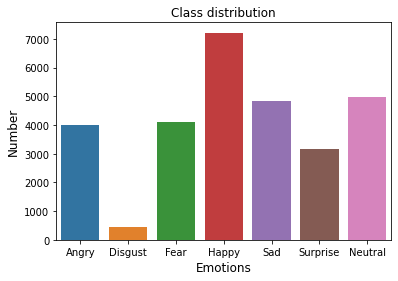

In [7]:
# Emotion Counts
training = data.loc[data["Usage"] == "Training"]

emotion_map = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
emotion_counts = training['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

/home/hasan/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


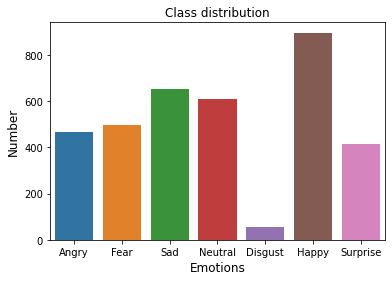

In [8]:
public_test = data.loc[data["Usage"] == "PublicTest"]

emotion_map = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
emotion_counts = public_test['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

/home/hasan/code/jupyterenvironment/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


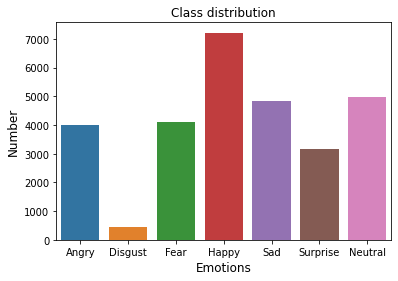

In [9]:
emotion_map = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
emotion_counts = training['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

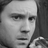

Angry


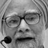

Angry


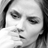

Fear


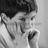

Sad


In [10]:
# Let's look at the first 4 pictures
from PIL import Image
from IPython.display import display
height = int(np.sqrt(len(data.pixels[0].split()))) 
width = int(height)
depth = 1

labels =  ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

for i in range(0, 4):
    matrix_array = np.mat(data.pixels[i]).reshape(height, width)
    img = Image.fromarray(matrix_array.astype(np.uint8))
    display(img)
    print(labels[data.emotion[i]])

# 3. Data processing

In [11]:
from tensorflow.keras.utils import to_categorical
training = data.loc[data["Usage"] == "Training"]
public_test = data.loc[data["Usage"] == "PublicTest"]
private_test = data.loc[data["Usage"] == "PrivateTest"]

# Converts a label vector (integers) to binary class matrix.
train_labels = training["emotion"]
train_labels = to_categorical(train_labels)
# train_labels.shape: (28709, 7)

train_pixels = training["pixels"].str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
# train_pixels.shape (28709, 48*48
train_pixels = train_pixels.reshape((28709, 48, 48, 1))
# normalization
train_pixels = train_pixels.astype("float32") / 255


private_labels = private_test["emotion"]
private_labels = to_categorical(private_labels)

private_pixels = private_test["pixels"].str.split(" ").tolist()
private_pixels = np.uint8(private_pixels)
private_pixels = private_pixels.reshape((3589, 48, 48, 1))
private_pixels = private_pixels.astype("float32") / 255


public_labels = public_test["emotion"]
public_labels = to_categorical(public_labels)

public_pixels = public_test["pixels"].str.split(" ").tolist()
public_pixels = np.uint8(public_pixels)
public_pixels = public_pixels.reshape((3589, 48, 48, 1))
public_pixels = public_pixels.astype("float32") / 255

# 4. Create Model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 64)        2

In [14]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics="accuracy")

In [15]:
history = model.fit(train_pixels, train_labels, validation_data=(private_pixels, private_labels),
                    epochs=20, batch_size = 128)

Epoch 1/20
225/225 [==============================] - 161s 683ms/step - loss: 1.7997 - accuracy: 0.3462 - val_loss: 1.9244 - val_accuracy: 0.2611
Epoch 2/20
225/225 [==============================] - 163s 723ms/step - loss: 1.4429 - accuracy: 0.4539 - val_loss: 1.6872 - val_accuracy: 0.3619
Epoch 3/20
225/225 [==============================] - 165s 731ms/step - loss: 1.2994 - accuracy: 0.5076 - val_loss: 1.3408 - val_accuracy: 0.4831
Epoch 4/20
225/225 [==============================] - 164s 728ms/step - loss: 1.2095 - accuracy: 0.5402 - val_loss: 1.2039 - val_accuracy: 0.5469
Epoch 5/20
225/225 [==============================] - 167s 743ms/step - loss: 1.1425 - accuracy: 0.5727 - val_loss: 1.1698 - val_accuracy: 0.5575
Epoch 6/20
225/225 [==============================] - 169s 752ms/step - loss: 1.0869 - accuracy: 0.5926 - val_loss: 1.1650 - val_accuracy: 0.5645
Epoch 7/20
225/225 [==============================] - 184s 818ms/step - loss: 1.0360 - accuracy: 0.6078 - val_loss: 1.1345 -

# 4. Model Evaluation

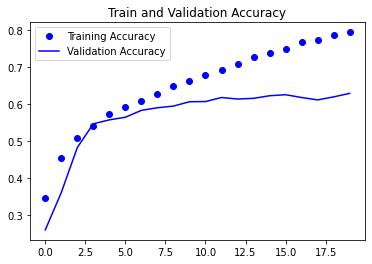

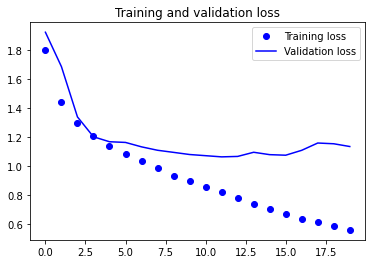

In [16]:
train_acc  = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_acc, 'b', label="Validation Accuracy")
plt.title("Train and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()